In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
df = pd.read_csv('all_data.csv')
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [3]:
df.rename(columns={'Life expectancy at birth (years)': 'Life_expectancy_at_birth_in_years'}, inplace=True)
df.describe(include='all')

,Country,Year,Life_expectancy_at_birth_in_years,GDP
count,96,96.000000,96.000000,9.600000e+01
unique,6,NaN,NaN,NaN
top,Chile,NaN,NaN,NaN
freq,16,NaN,NaN,NaN
mean,NaN,2007.500000,72.789583,3.880499e+12
std,NaN,4.633971,10.672882,5.197561e+12
min,NaN,2000.000000,44.300000,4.415703e+09
25%,NaN,2003.750000,74.475000,1.733018e+11
50%,NaN,2007.500000,76.750000,1.280220e+12
75%,NaN,2011.250000,78.900000,4.067510e+12


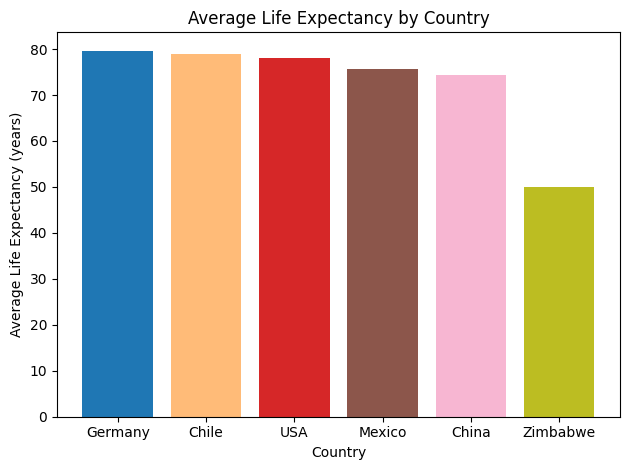

In [4]:
countries_number = len(df['Country'].unique())
mean_life_expectancy = df.groupby('Country')['Life_expectancy_at_birth_in_years'].mean().sort_values(ascending=False)

mean_life_expectancy.index = mean_life_expectancy.index.map(lambda x: 'USA' if x == 'United States of America' else x)

#colours
cmap = plt.get_cmap('tab20')

plt.bar(mean_life_expectancy.index, mean_life_expectancy, color=[cmap(i / countries_number) for i in range(countries_number)])
plt.xlabel('Country')
plt.ylabel('Average Life Expectancy (years)')
plt.title('Average Life Expectancy by Country')

plt.tight_layout()

plt.show()

The graph shows differences in life expectancy between countries.
Germany has the highest life expectancy (79.66 years), while Zimbabwe has the lowest life expectancy (50.09 years), reflecting difficulties related to healthcare, war or disease.

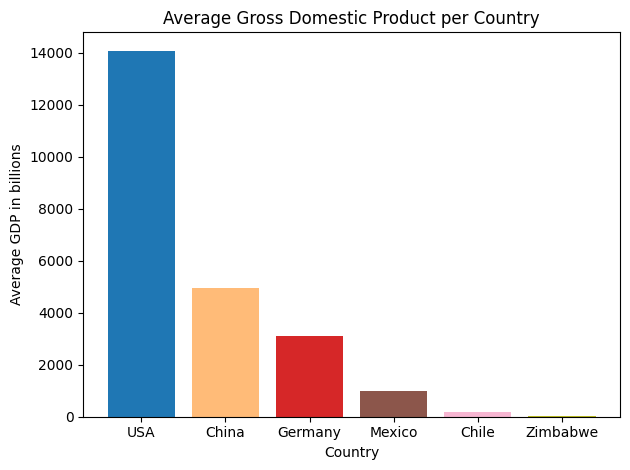

In [5]:
mean_GDP = df.groupby('Country')['GDP'].mean().sort_values(ascending=False)

mean_GDP.index = mean_GDP.index.map(lambda x: 'USA' if x == 'United States of America' else x)


plt.bar(mean_GDP.index, mean_GDP/ 1e9, color=[cmap(i / countries_number) for i in range(countries_number)])
plt.xlabel('Country')
plt.ylabel('Average GDP in billions')
plt.title('Average Gross Domestic Product per Country')

plt.tight_layout()

plt.show()

The data shows the Gross Domestic Product (GDP) for selected countries. The USA has the highest GDP ($14.08 trillion), followed by China ($4.96 trillion), and Zimbabwe has by far the lowest GDP, at only about $9.06 billion.

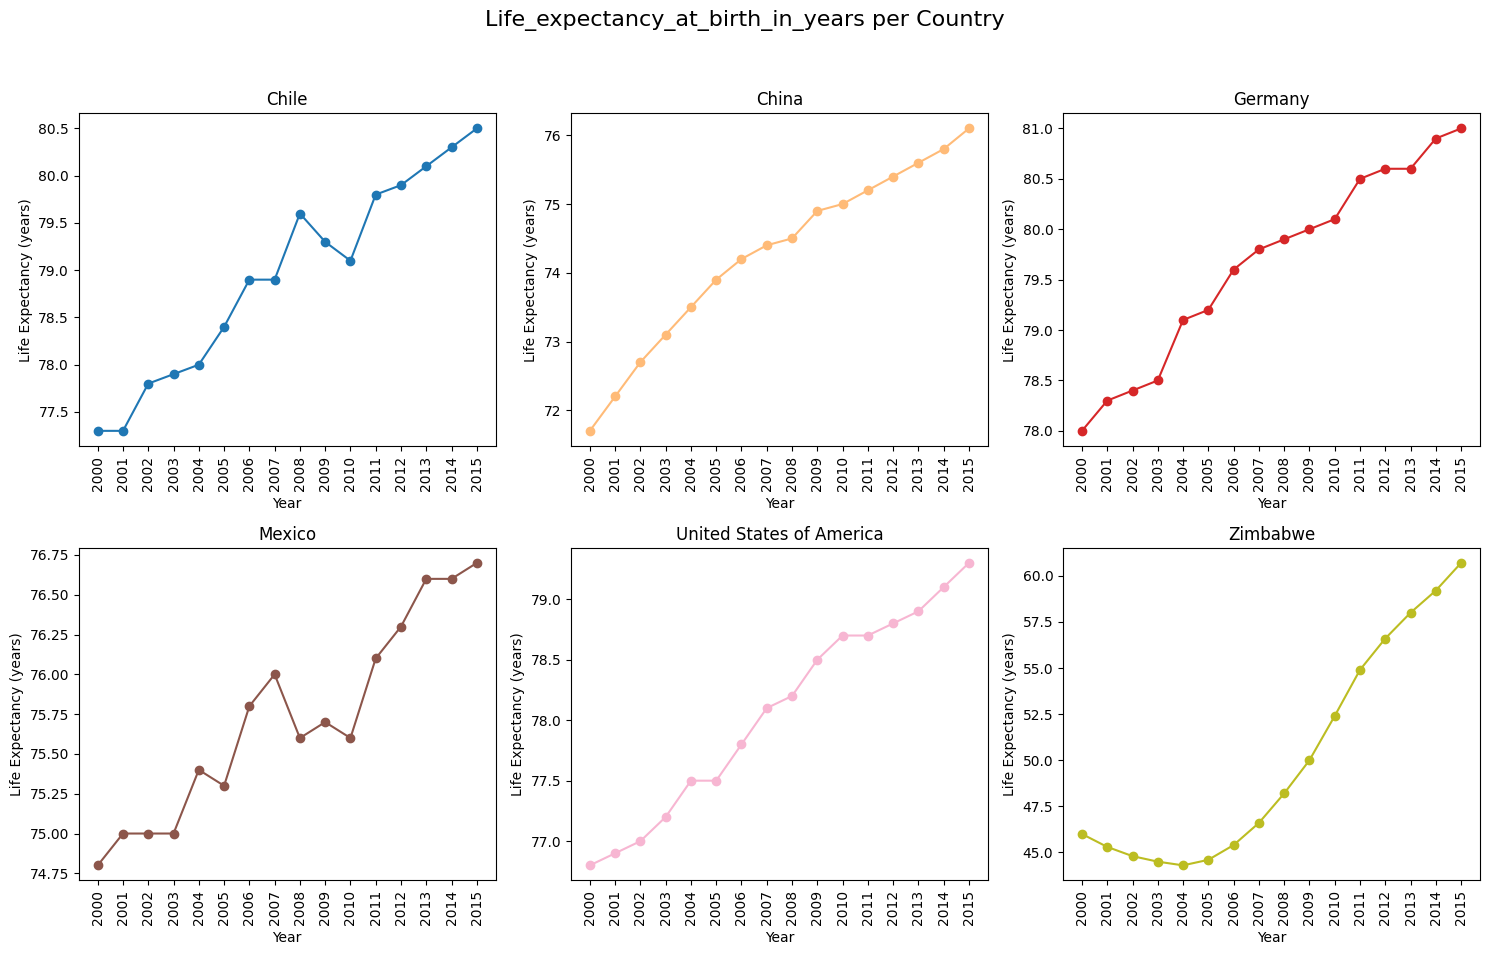

In [6]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, (country, country_data) in enumerate(df.groupby('Country')):
    color = cmap(i / len(df['Country'].unique()))
    axes[i].plot(country_data['Year'], country_data['Life_expectancy_at_birth_in_years'], marker='o', color=color)
    axes[i].set_title(country)
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Life Expectancy (years)')
    
    axes[i].set_xticks(country_data['Year'])
    axes[i].tick_params(axis='x', rotation=90)

fig.suptitle('Life_expectancy_at_birth_in_years per Country', fontsize=16)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


The graphs above show that for each country, life expectancy in 2015 is higher than in 2000. The lowest life expectancy was observed in Zimbabwe in 2004, at 44.3 years. 
 
In countries considered to be more developed, life expectancy increases in a continuous, almost linear manner. In poorer countries, life expectancy decreases at times and then increases moments later. For most countries, life expectancy has increased by about 2-4 years, for Zimbabwe the value has increased by about 15 years.

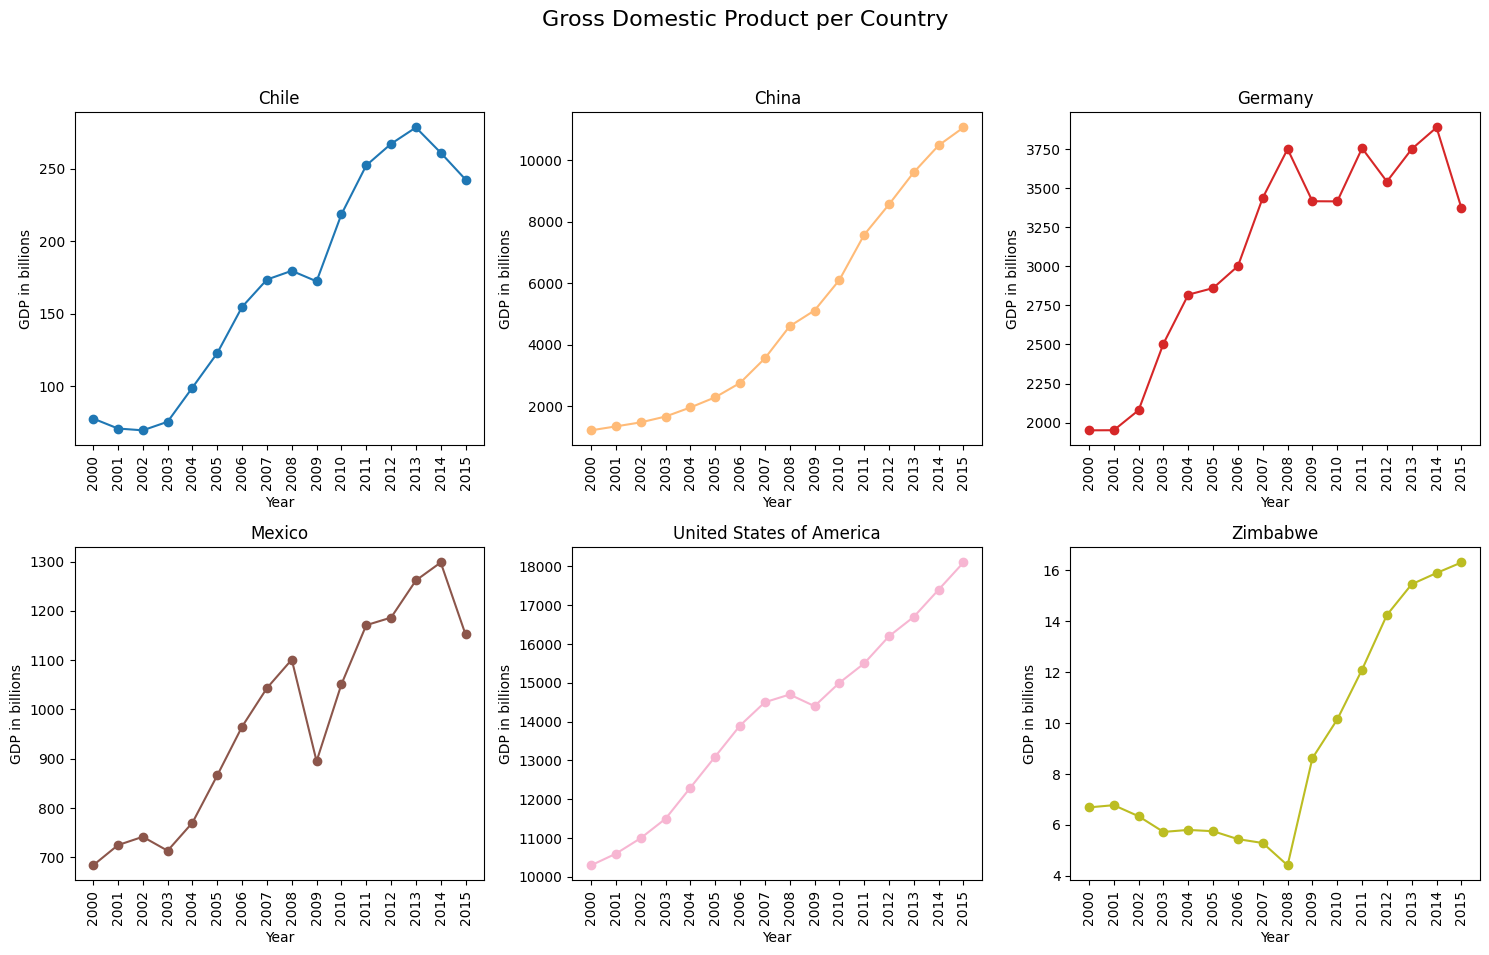

In [7]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, (country, country_data) in enumerate(df.groupby('Country')):
    color = cmap(i / len(df['Country'].unique()))
    axes[i].plot(country_data['Year'], country_data['GDP'] / 1e9, marker='o', color=color)
    axes[i].set_title(country)
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('GDP in billions')
    
    axes[i].set_xticks(country_data['Year'])
    axes[i].tick_params(axis='x', rotation=90)

fig.suptitle('Gross Domestic Product per Country', fontsize=16)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

The graphs above show that for each country the GPD in 2015 is higher than in 2000. The lowest GPD was observed in Zimbabwe in 2008 at 4.4 billion. 
 
The highest GPD was observed in the USA in 2015 where it was 181000 billion. For most countries, the jump between the lowest and highest GPD is almost double, with Zimbabwe's GPD almost quadrupling. It is also noteworthy that 3 out of 6 countries recorded a significant decline in GDP between 2013 and 2015.

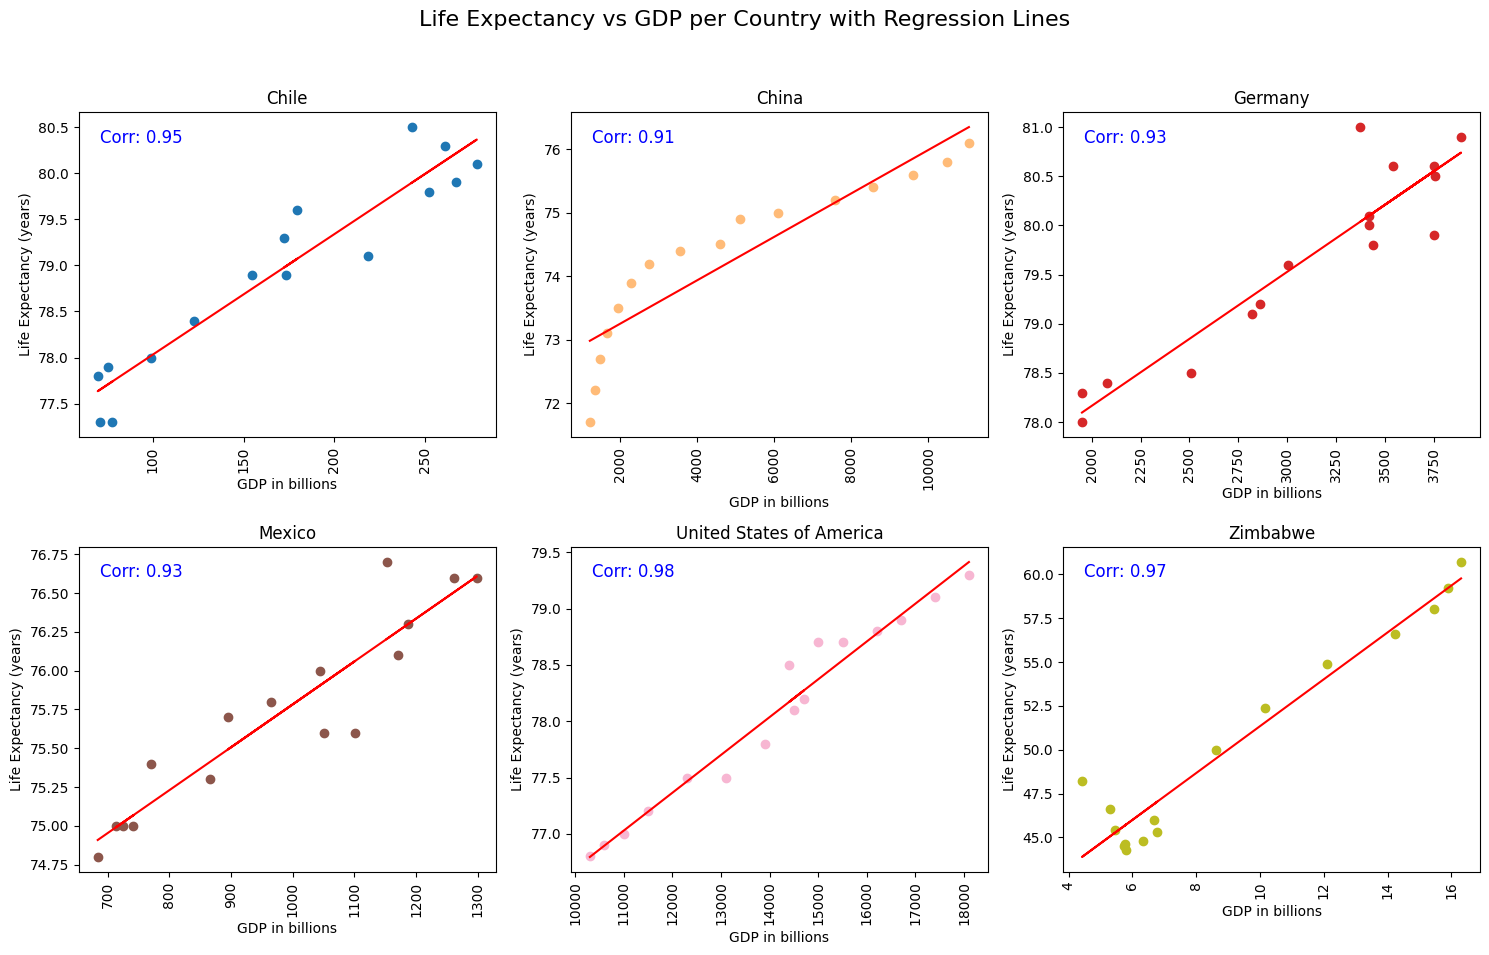

In [8]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, (country, country_data) in enumerate(df.groupby('Country')):
    color = cmap(i / 6)
    axes[i].scatter(country_data['GDP'] / 1e9, country_data['Life_expectancy_at_birth_in_years'], color=color)
    axes[i].set_title(country)
    axes[i].set_xlabel('GDP in billions')
    axes[i].set_ylabel('Life Expectancy (years)')
    
    # OLS
    formula = 'Life_expectancy_at_birth_in_years ~ GDP'
    model = sm.OLS.from_formula(formula = formula, data=country_data)
    result = model.fit()
    
    country_data['predicted_life_expectancy'] = result.predict(country_data['GDP'])
    
    axes[i].plot(country_data['GDP'] / 1e9, country_data['predicted_life_expectancy'], color='red', label='Regression Line')
    axes[i].tick_params(axis='x', rotation=90)
    
    correlation = country_data['Life_expectancy_at_birth_in_years'].corr(country_data['GDP'])
    axes[i].text(0.05, 0.95, f'Corr: {correlation:.2f}', transform=axes[i].transAxes, fontsize=12, verticalalignment='top', color='blue')

fig.suptitle('Life Expectancy vs GDP per Country with Regression Lines', fontsize=16)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

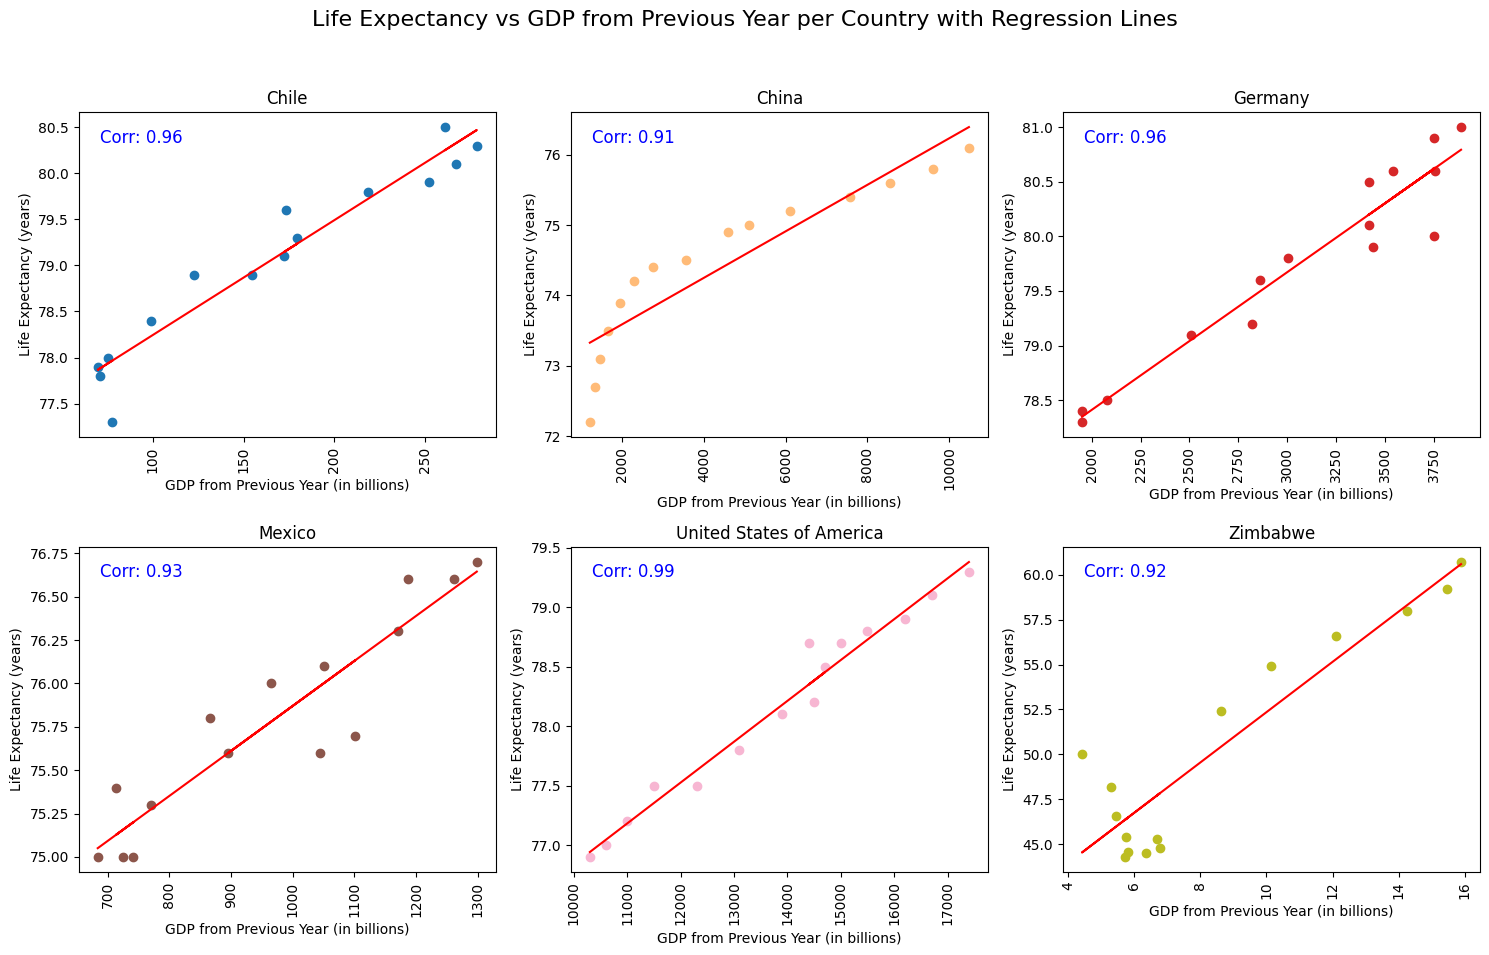

In [9]:
# Correlation of life expectancy in previous year's GDP
df['GDP_previous_year'] = df.groupby('Country')['GDP'].shift(1)


fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, (country, country_data) in enumerate(df.groupby('Country')):
    color = cmap(i / 6)
    axes[i].scatter(country_data['GDP_previous_year'] / 1e9, country_data['Life_expectancy_at_birth_in_years'], color=color)
    axes[i].set_title(country)
    axes[i].set_xlabel('GDP from Previous Year (in billions)')
    axes[i].set_ylabel('Life Expectancy (years)')
    
    # OLS
    formula = 'Life_expectancy_at_birth_in_years ~ GDP_previous_year'
    model = sm.OLS.from_formula(formula = formula, data=country_data)
    result = model.fit()
    
    country_data['predicted_life_expectancy'] = result.predict(country_data['GDP_previous_year'])
    
    axes[i].plot(country_data['GDP_previous_year'] / 1e9, country_data['predicted_life_expectancy'], color='red', label='Regression Line')
    axes[i].tick_params(axis='x', rotation=90)
    
    correlation = country_data['Life_expectancy_at_birth_in_years'].corr(country_data['GDP_previous_year'])
    axes[i].text(0.05, 0.95, f'Corr: {correlation:.2f}', transform=axes[i].transAxes, fontsize=12, verticalalignment='top', color='blue')
    

fig.suptitle('Life Expectancy vs GDP from Previous Year per Country with Regression Lines', fontsize=16)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In the graphs above, it is clear that for all the countries mentioned there is a strong correlation between GDP and life expectancy. For the vast majority of countries (5 out of 6), there is an even stronger correlation between life expectancy and GDP for the previous year.